In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import graphviz

In [2]:
df = pd.read_csv("online_course_engagement_data.csv")

EDA

In [3]:
df

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0
...,...,...,...,...,...,...,...,...,...
8995,8757,Health,37.445225,14,4,54.469359,32.990704,1,0
8996,894,Science,48.631443,7,7,59.413257,0.254625,0,0
8997,6323,Health,38.212512,3,3,69.508297,70.188159,1,0
8998,3652,Health,70.048665,13,10,79.655182,72.975225,1,1


In [4]:
df.describe()

,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4498.894556,50.163822,10.024667,5.090556,74.706028,50.340146,0.500667,0.396444
std,2596.849433,28.491750,6.029878,3.157762,14.378383,28.950977,0.500027,0.489186
min,1.000000,1.005230,0.000000,0.000000,50.005119,0.009327,0.000000,0.000000
25%,2251.750000,25.440548,5.000000,2.000000,62.283451,25.653614,0.000000,0.000000
50%,4483.500000,49.818417,10.000000,5.000000,74.743294,50.264124,1.000000,0.000000
75%,6751.250000,75.069924,15.000000,8.000000,87.022663,75.572493,1.000000,1.000000
max,9000.000000,99.992558,20.000000,10.000000,99.994984,99.979711,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 9000 non-null   int64  
 1   CourseCategory         9000 non-null   object 
 2   TimeSpentOnCourse      9000 non-null   float64
 3   NumberOfVideosWatched  9000 non-null   int64  
 4   NumberOfQuizzesTaken   9000 non-null   int64  
 5   QuizScores             9000 non-null   float64
 6   CompletionRate         9000 non-null   float64
 7   DeviceType             9000 non-null   int64  
 8   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 632.9+ KB


In [6]:
df.NumberOfQuizzesTaken.value_counts()

NumberOfQuizzesTaken
9     872
10    847
5     839
6     838
8     828
2     827
4     808
7     805
1     789
3     780
0     767
Name: count, dtype: int64

In [7]:
df.isnull().sum()

UserID                   0
CourseCategory           0
TimeSpentOnCourse        0
NumberOfVideosWatched    0
NumberOfQuizzesTaken     0
QuizScores               0
CompletionRate           0
DeviceType               0
CourseCompletion         0
dtype: int64

In [8]:
selected = df.drop(columns=['CourseCategory',"UserID"])
selected.corr()

,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
TimeSpentOnCourse,1.000000,0.019833,-0.012562,-0.006152,0.020934,0.004144,0.182553
NumberOfVideosWatched,0.019833,1.000000,-0.020059,-0.017497,0.016257,0.007403,0.234360
NumberOfQuizzesTaken,-0.012562,-0.020059,1.000000,-0.012295,0.006892,0.015973,0.284504
QuizScores,-0.006152,-0.017497,-0.012295,1.000000,-0.012303,0.004225,0.299983
CompletionRate,0.020934,0.016257,0.006892,-0.012303,1.000000,-0.004767,0.326139
DeviceType,0.004144,0.007403,0.015973,0.004225,-0.004767,1.000000,0.007551
CourseCompletion,0.182553,0.234360,0.284504,0.299983,0.326139,0.007551,1.000000


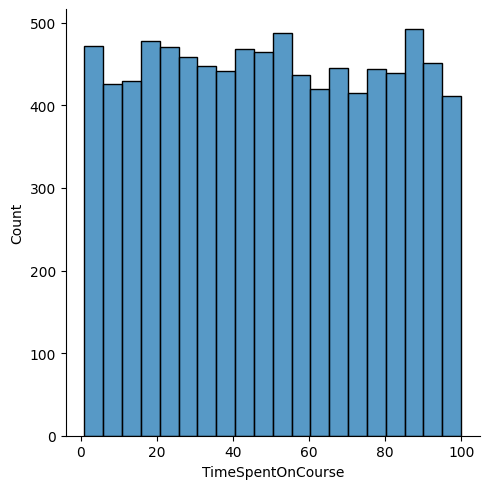

In [9]:
sns.displot(df, x="TimeSpentOnCourse",binwidth=5)

<Axes: >

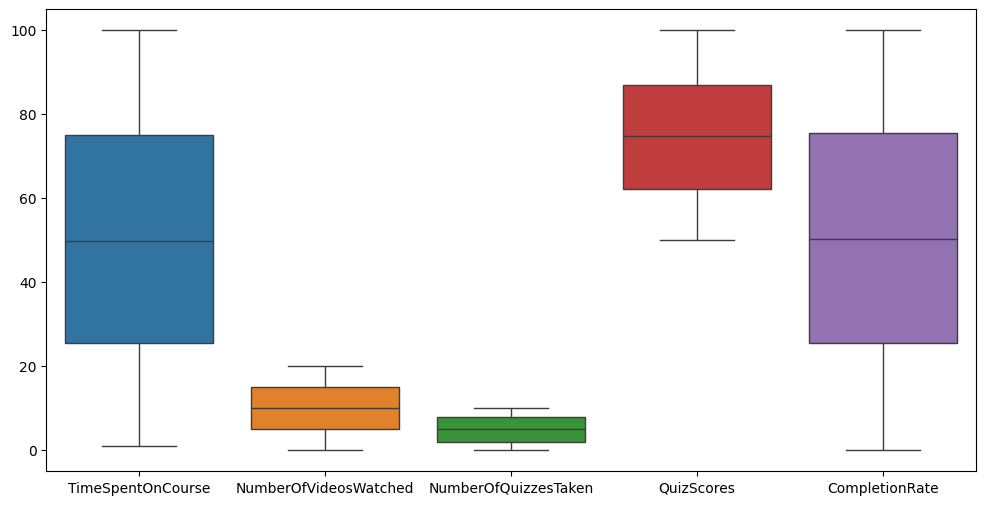

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=selected.drop(columns = ["DeviceType","CourseCompletion"]))

In [11]:
#one_hot_encoded_data = pd.get_dummies(df, columns=['CourseCategory'])

In [12]:
#one_hot_encoded_data

In [13]:
df.isnull().sum()

UserID                   0
CourseCategory           0
TimeSpentOnCourse        0
NumberOfVideosWatched    0
NumberOfQuizzesTaken     0
QuizScores               0
CompletionRate           0
DeviceType               0
CourseCompletion         0
dtype: int64

Cleansing Data

In [14]:
one_hot = pd.get_dummies(df, columns=['CourseCategory']) #nominal to binary
one_hot

,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion,CourseCategory_Arts,CourseCategory_Business,CourseCategory_Health,CourseCategory_Programming,CourseCategory_Science
0,5618,29.979719,17,3,50.365656,20.860773,1,0,False,False,True,False,False
1,4326,27.802640,1,5,62.615970,65.632415,1,0,True,False,False,False,False
2,5849,86.820485,14,2,78.458962,63.812007,1,1,True,False,False,False,False
3,4992,35.038427,17,10,59.198853,95.433162,0,1,False,False,False,False,True
4,3866,92.490647,16,0,98.428285,18.102478,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,8757,37.445225,14,4,54.469359,32.990704,1,0,False,False,True,False,False
8996,894,48.631443,7,7,59.413257,0.254625,0,0,False,False,False,False,True
8997,6323,38.212512,3,3,69.508297,70.188159,1,0,False,False,True,False,False
8998,3652,70.048665,13,10,79.655182,72.975225,1,1,False,False,True,False,False


In [15]:
normalization = ['TimeSpentOnCourse', 'QuizScores',"CompletionRate"]
scaler = MinMaxScaler(feature_range=(0, 1))
one_hot[normalization] = scaler.fit_transform(one_hot[normalization])

In [16]:
X=one_hot.drop(['UserID','CourseCompletion'],axis=1)
y=one_hot['CourseCompletion']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
X_train.head()

,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCategory_Arts,CourseCategory_Business,CourseCategory_Health,CourseCategory_Programming,CourseCategory_Science
7581,0.669381,17,10,0.114949,0.277887,0,True,False,False,False,False
8484,0.986390,14,0,0.982639,0.608977,1,False,True,False,False,False
6215,0.426392,15,7,0.759399,0.828582,0,False,True,False,False,False
6884,0.811066,5,3,0.442752,0.304221,0,False,False,True,False,False
3647,0.284088,6,10,0.845855,0.721950,0,True,False,False,False,False


Decision Tree (Pre pruning)


In [19]:
clf = DecisionTreeClassifier()
grid_param={"criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":range(2,20,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1) 
            }
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']})

In [20]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}


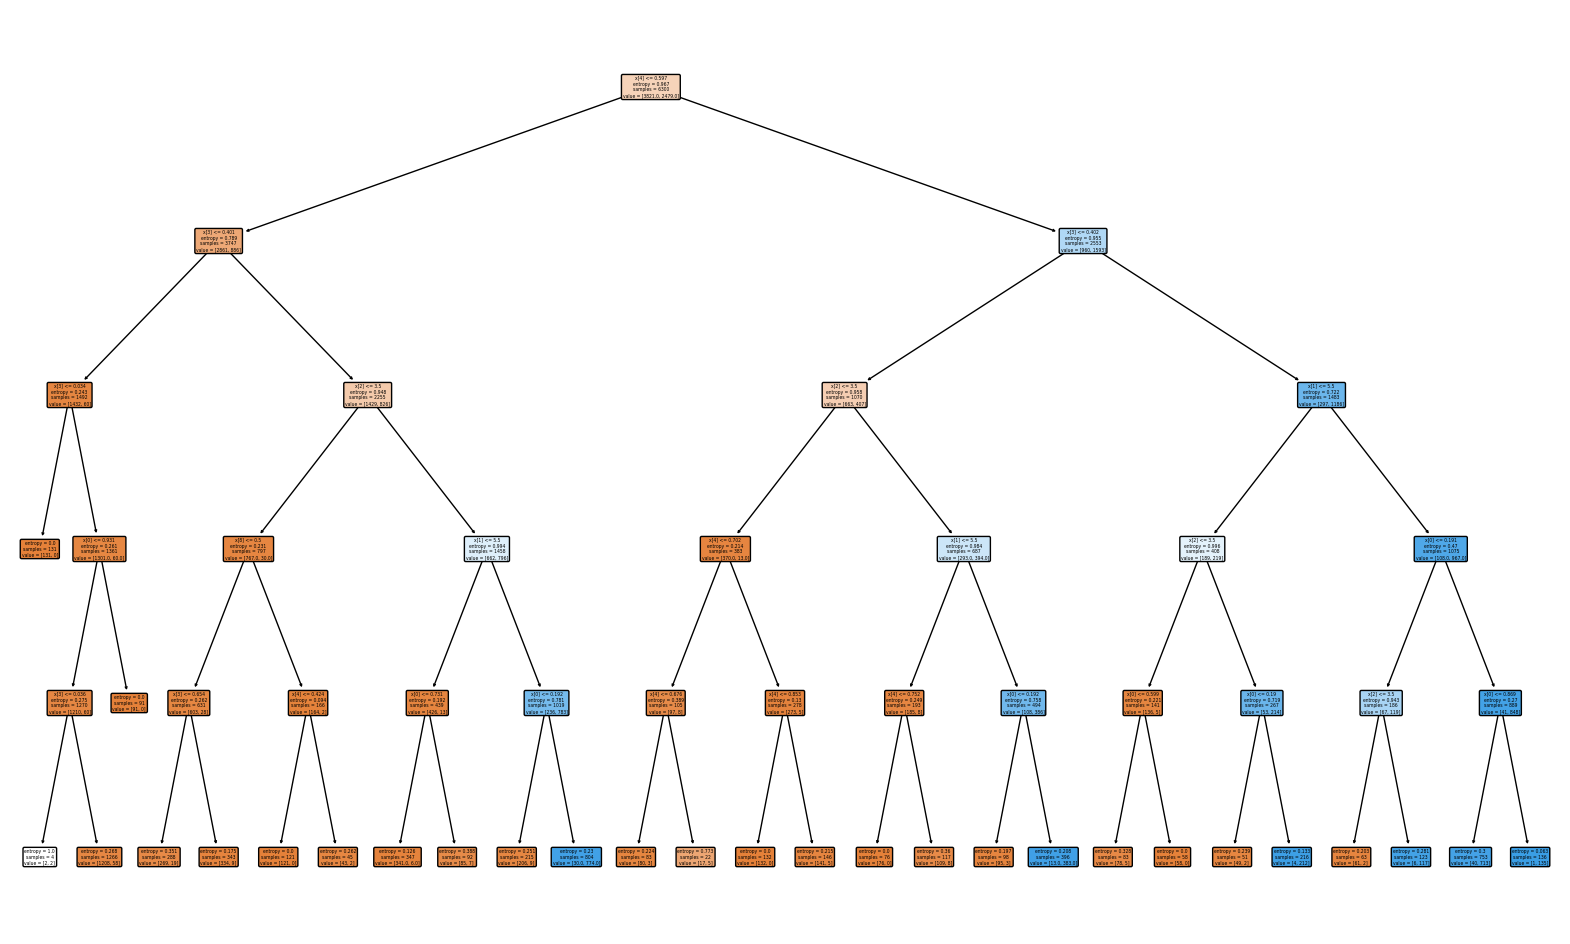

In [21]:
clf=DecisionTreeClassifier(criterion= 'entropy',max_depth= 5,min_samples_leaf= 4,min_samples_split= 2,splitter= 'best')
clf.fit(X_train,y_train)
plt.figure(figsize=(20,12))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [22]:
y_pred = clf.predict(X_test)

In [23]:
print('Accuracy : ',accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_test,y_pred))

Accuracy :  0.9540740740740741
[[1565   78]
 [  46 1011]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1611
           1       0.96      0.93      0.94      1089

    accuracy                           0.95      2700
   macro avg       0.95      0.95      0.95      2700
weighted avg       0.95      0.95      0.95      2700



Logistic Regression


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statistics
lr = LogisticRegression()
lrmodel = lr.fit(X_train, y_train)

In [25]:
y_pred_lr = lrmodel.predict(X_test)

In [26]:
print('Accuracy : ',accuracy_score(y_pred_lr,y_test))
print(confusion_matrix(y_pred_lr,y_test))
print(classification_report(y_test,y_pred_lr))

Accuracy :  0.7948148148148149
[[1374  317]
 [ 237  772]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1611
           1       0.77      0.71      0.74      1089

    accuracy                           0.79      2700
   macro avg       0.79      0.78      0.78      2700
weighted avg       0.79      0.79      0.79      2700

